Raisins data assignment 

In [ ]:
# import data
import pandas
raisins = pandas.read_excel('Raisin_Dataset.xlsx')
# show some basic info about the data
raisins.info()
raisins.head()
raisins.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,Besni


In [ ]:
# convert the Class to an integer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
raisins['Class'] = le.fit_transform(raisins['Class']).astype("uint8")

In [ ]:
# show info again
raisins.info()
raisins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    uint8  
dtypes: float64(5), int64(2), uint8(1)
memory usage: 50.2 KB


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


<ipython-input-4-ef1d0af56ce0>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


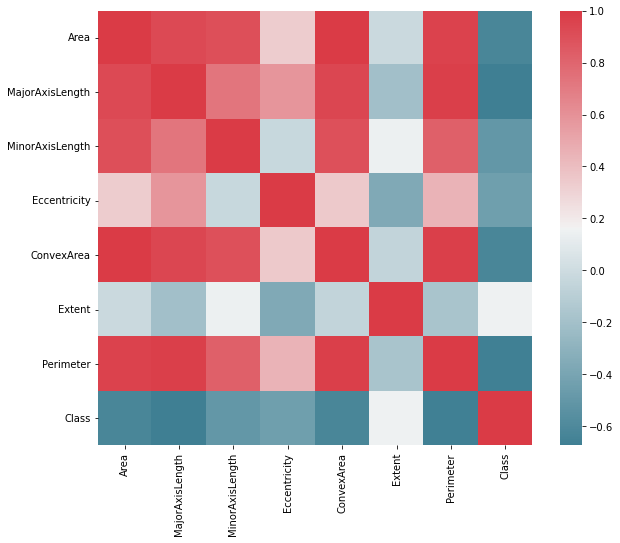

In [ ]:
# check if any features are highly correlated
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize = (10, 8))
corr = raisins.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

In [ ]:
# A lot of the features are highly correlated, but I will try the model once without droppping features

# create our X and Y variables
X = raisins.drop(['Class'], axis = 1)
Y = raisins['Class']

In [ ]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# standardize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [ ]:
# set up the neural network model
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = (7,)))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# compile the model for the raisins dataset
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.05)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 500, batch_size = 256, verbose = 1, validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/500
3/3 [==============================] - 2s 215ms/step - loss: 0.6677 - accuracy: 0.5153 - val_loss: 0.5954 - val_accuracy: 0.6778
Epoch 2/500
3/3 [==============================] - 0s 38ms/step - loss: 0.5691 - accuracy: 0.7556 - val_loss: 0.5101 - val_accuracy: 0.8167
Epoch 3/500
3/3 [==============================] - 0s 69ms/step - loss: 0.4972 - accuracy: 0.7944 - val_loss: 0.4556 - val_accuracy: 0.8444
Epoch 4/500
3/3 [==============================] - 0s 61ms/step - loss: 0.4530 - accuracy: 0.8486 - val_loss: 0.4236 - val_accuracy: 0.8778
Epoch 5/500
3/3 [==============================] - 0s 31ms/step - loss: 0.4348 - accuracy: 0.8569 - val_loss: 0.4177 - val_accuracy: 0.8611
Epoch 6/500
3/3 [==============================] - 0s 35ms/step - loss: 0.4213 - accuracy: 0.8514 - val_loss: 0.3886 - val_accuracy: 0.8778
Epoch 7/500
3/3 [==============================] - 0s 45ms/step - loss: 0.4067 - accuracy: 0.8611 - val_loss: 0.3856 - val_accuracy: 0.8778
Epoch 8/500
3/3 [==

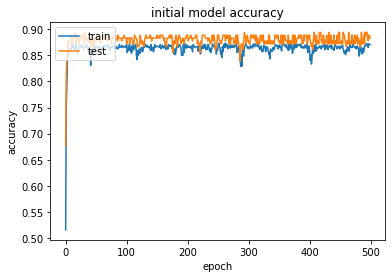

In [ ]:
# graph the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('initial model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Without dropping any highly correlated features, the model had an accuracy of 87.8% test and 87.6% train.

In [ ]:
# create X and Y again, but this time drop some of the highly correlated variables
X2 = raisins.drop(['Class', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter'], axis = 1)
Y2 = raisins['Class']

In [ ]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [ ]:
# standardize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X2_train)
X2_train = fit.transform(X2_train)
X2_test = fit.transform(X2_test)

In [ ]:
# set up the neural network model
from keras import Sequential
from keras.layers import Dense
model2 = Sequential()
model2.add(Dense(8, activation = 'relu', input_shape = (3,)))
model2.add(Dense(4, activation = 'relu'))
model2.add(Dense(1, activation = 'tanh'))

In [ ]:
# compile the model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.05)
model2.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history2 = model2.fit(X2_train, Y2_train, epochs = 500, batch_size = 256, verbose = 1, validation_data=(X2_test, Y2_test))

loss, acc = model2.evaluate(X2_test, Y2_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model2.evaluate(X2_train, Y2_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/500
3/3 [==============================] - 1s 97ms/step - loss: 1.0285 - accuracy: 0.4819 - val_loss: 0.8451 - val_accuracy: 0.5222
Epoch 2/500
3/3 [==============================] - 0s 29ms/step - loss: 0.9551 - accuracy: 0.4944 - val_loss: 0.9639 - val_accuracy: 0.5222
Epoch 3/500
3/3 [==============================] - 0s 28ms/step - loss: 0.9928 - accuracy: 0.4944 - val_loss: 0.8619 - val_accuracy: 0.5222
Epoch 4/500
3/3 [==============================] - 0s 23ms/step - loss: 0.8623 - accuracy: 0.4944 - val_loss: 0.7409 - val_accuracy: 0.5222
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.7362 - accuracy: 0.4972 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 6/500
3/3 [==============================] - 0s 30ms/step - loss: 0.7034 - accuracy: 0.4653 - val_loss: 0.7199 - val_accuracy: 0.4778
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.7153 - accuracy: 0.5056 - val_loss: 0.7432 - val_accuracy: 0.4778
Epoch 8/500
3/3 [===

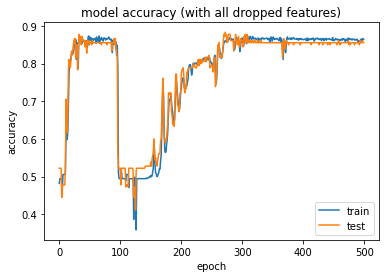

In [ ]:
# graph the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy (with all dropped features)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

After dropping one of the highly correlated features (I chose MajorAxisLength as it was highly correlated with several other features) the accuracy was not changed by a significant amount (~1%). 

I next attempted a model with both MajorAxisLength and MinorAxisLength dropped, which again didn't change the accuracy by a significant amount (increased by ~1.5% across both test & train). 

Then, I attempted another model with MajorAxisLength, MinorAxisLength, and ConvexArea dropped. The results of this were interesting; as the accuraccy actually improved to 90% on the testing data. 

Finally, I attempted one last model with all the highly correlated features dropped: MajorAxisLength, MinorAxisLength, ConvexArea, and Perimeter. This led to a much worse model overall (only ~50% accuracy) so I decided to use the previous model as the final one. 

In [ ]:
# final model has MajorAxisLength, MinorAxisLength, and ConvexArea dropped
X3 = raisins.drop(['Class', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea'], axis = 1)
Y3 = raisins['Class']

from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X3_train)
X3_train = fit.transform(X3_train)
X3_test = fit.transform(X3_test)

In [ ]:
# set up the neural network model
from keras import Sequential
from keras.layers import Dense
model3 = Sequential()
model3.add(Dense(8, activation = 'relu', input_shape = (4,)))
model3.add(Dense(4, activation = 'relu'))
model3.add(Dense(1, activation = 'tanh'))

In [ ]:
# compile the model for the raisins dataset, using the X that had one of the highly correlated features dropped
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.05)
model3.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history3 = model3.fit(X3_train, Y3_train, epochs = 500, batch_size = 256, verbose = 1, validation_data=(X3_test, Y3_test))

loss, acc = model3.evaluate(X3_test, Y3_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model3.evaluate(X3_train, Y3_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/500
3/3 [==============================] - 1s 105ms/step - loss: 3.2819 - accuracy: 0.5000 - val_loss: 0.6414 - val_accuracy: 0.7389
Epoch 2/500
3/3 [==============================] - 0s 19ms/step - loss: 0.7007 - accuracy: 0.5819 - val_loss: 0.8062 - val_accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 0s 23ms/step - loss: 0.8223 - accuracy: 0.5000 - val_loss: 0.8128 - val_accuracy: 0.5000
Epoch 4/500
3/3 [==============================] - 0s 22ms/step - loss: 0.8006 - accuracy: 0.5000 - val_loss: 0.7415 - val_accuracy: 0.5000
Epoch 5/500
3/3 [==============================] - 0s 30ms/step - loss: 0.7249 - accuracy: 0.5014 - val_loss: 0.6757 - val_accuracy: 0.5056
Epoch 6/500
3/3 [==============================] - 0s 25ms/step - loss: 0.6727 - accuracy: 0.5403 - val_loss: 0.6511 - val_accuracy: 0.7833
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6553 - accuracy: 0.7361 - val_loss: 0.6559 - val_accuracy: 0.5611
Epoch 8/500
3/3 [==

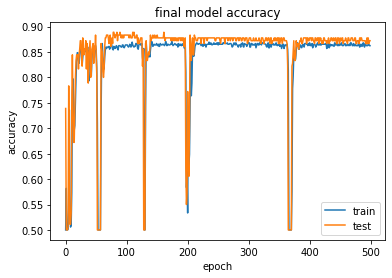

In [ ]:
# graph the model accuracy over time
import matplotlib.pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('final model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

Even after adjusting some parameters, I didn't have much luck improving the accuracy of this model further. It always hovered between roughly 85 and 89%. 